In [1]:
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests
import csv
import re 

In [2]:
df = pd.read_csv (r'Final_Data.csv',sep=",")
df.drop("Unnamed: 0",axis='columns', inplace=True)
df

,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country
0,29.0,14,37,105,1015,Ashkasham,Badakhshan,Afghanistan
1,42.0,29,23,86,1005,BazareTashkan,Badakhshan,Afghanistan
2,42.0,22,26,52,1005,HafizMoghul,Badakhshan,Afghanistan
3,42.0,18,40,134,1013,KuranwaMunjan,Badakhshan,Afghanistan
4,42.0,31,21,85,1004,Mashhad,Badakhshan,Afghanistan
...,...,...,...,...,...,...,...,...
58628,46.0,20,25,83,1019,Beitbridge,MatabelelandSouth,Zimbabwe
58629,42.0,15,14,41,1021,Kwekwe,Midlands,Zimbabwe
58630,53.0,15,21,78,1021,Plumtree,MatabelelandSouth,Zimbabwe
58631,42.0,13,18,99,1022,Mvuma,Midlands,Zimbabwe


Relationships between variables

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

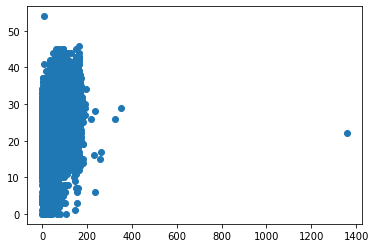

In [4]:
plt.scatter(df.AQI, df.Temperature)

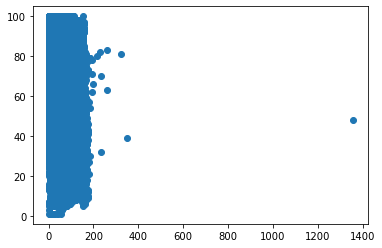

In [5]:
plt.scatter(df.AQI, df.Humidity)

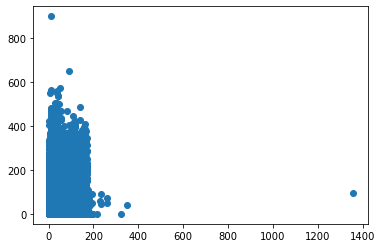

In [6]:
plt.scatter(df.AQI, df.Wind)

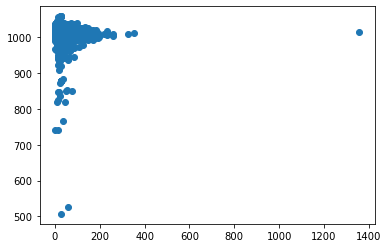

In [7]:
plt.scatter(df.AQI, df.Pressure)

Cut AQI levels, and how many there are in each level

In [8]:
pd.cut(df["AQI"],bins=6).value_counts()

(-1.357, 226.167]      58581
(226.167, 452.333]         7
(1130.833, 1357.0]         1
(904.667, 1130.833]        0
(678.5, 904.667]           0
(452.333, 678.5]           0
Name: AQI, dtype: int64

In [ ]:
plt.hist(df["AQI"],bins=6)

probability to "Good" AQI:

In [ ]:
df.AQI[df.AQI<50].count() / df.AQI.count()

probability to "Unhealthy" AQI:

In [ ]:
df.AQI[100<df.AQI<150].count() / df.AQI.count()

Add a column (0,1) if the AQI is OK.(1- not ok, 0-ok)

In [ ]:
IS_OK=list()
for row in df["AQI"]:
    if(row>150):
        IS_OK.append(1)
    else:
        IS_OK.append(0)
df['Is_AQI_OK']=IS_OK

In [ ]:
ct1=pd.crosstab(df["Temperature"],df['Is_AQI_OK'] )
ct1

In [ ]:
ct2=pd.crosstab(df["Temperature"],df['Is_AQI_OK'] , normalize='index')
ct2

In [ ]:
ct2.plot(kind='bar', figsize=(5,2))

plt.title('AQI VS Temperature', fontsize=10)
plt.xlable('Is_AQI_OK')
plt.ylable('Temperature')